Mapping the first five important variables of MLR and RF

绘制MLR和RF前五个重要变量图

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import myfunction as mf
path_data_raw = "C:/Users/dell/OneDrive/file/"
path_country_nc = "C:/Users/dell/OneDrive/file/nc"
path_one_spdb = 'C:/Users/dell/OneDrive/file/SPDB/'
drive_letter = 'E:'

path_pre = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/pretreatment/"
path_match = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/match/"
path_semdata = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/semdata/"


path_2_preanalysis_data = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part2_sem/preanalysis/"
path_2_preanalysis_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part2_sem/preanalysis/"
path_3_sw_forecast = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/"
path_3_lrsw_forecast = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/lrsw_forecast/"
path_temp = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/temp/"

path_1_describe_fig_fish = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/fish_diff/"
path_1_describe_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/"
mark_num = "25"
meta_name = "meta_data.csv"

path_ng_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/ng_fig/"
list_pfas =['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_color = ["#4d8cbf", "#4f9c8b", "#555c6c", "#d77563", "#7d84a8", "#84aeb8", "#c3473b", "#89756d","#ffb3cc","#9a7ebf","#ffddb8", "#c4eaff", "#d1c6ff", "#c2ffbf", "#f5f5b0",]

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def draw_rfecv_top(df_data, save_path, str_remark, top_num=5):
    """
    Mapping the first five important variables of MLR and RF
    ---
    绘制MLR和RF前五个重要变量图
    """

    df_o = df_data.copy()
    if str_remark == 'swnl':
        x_str = 'Importance'
        y_str = 'Feature'
        color = '#84aeb8'
    elif str_remark == 'swl':
        x_str = 'R2'
        y_str = 'variables'
        color = '#84aeb8'
    elif str_remark == 'lrnl':
        x_str = 'Importance'
        y_str = 'Feature'
        color = '#7d84a8'
    elif str_remark == 'lrl':
        x_str = 'R2'
        y_str = 'variables'
        color = '#7d84a8'
    df_o = df_o.sort_values(by=x_str, ascending=False).head(top_num)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
    sns.barplot(x=x_str, y=y_str, data=df_o, ax=ax, color=color,gap=.6)
    sns.despine(ax=ax, offset=10, trim=True, right=True, bottom=True, top=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('', fontsize=16, labelpad=10)
    ax.set_ylabel('', fontsize=16, labelpad=10)
    ax.set_title(x_str, fontsize=15)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height()/2, '{:.4f}'.format(width), ha = 'left', va = 'center')
    plt.subplots_adjust(left=0.45,right=0.9,bottom=0.15,top=0.7)
    plt.savefig(save_path, dpi = 300)
    plt.tight_layout()
    plt.show()

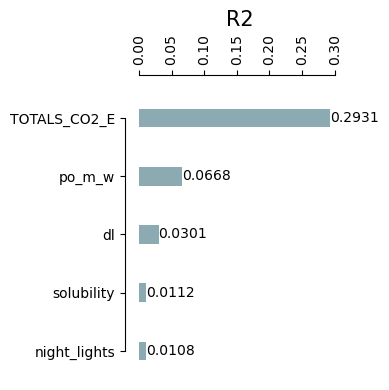

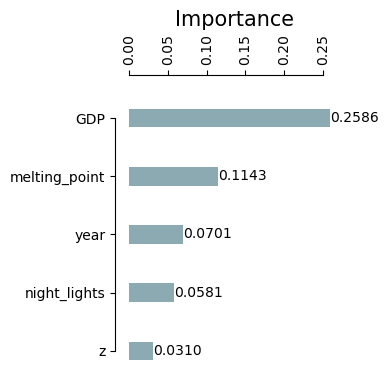

In [7]:
df_sw_mlr = pd.read_csv(path_2_preanalysis_data + 'mlr_sws7.csv')
df_sw_rf = pd.read_csv(path_3_sw_forecast + 'sws7_rfecv_features_RFcv.csv')

save_path_rf = path_ng_fig + "exfig1_sw_rfecv.svg"
save_path_mlr = path_ng_fig + "exfig1_sw_mlr.svg"

draw_rfecv_top(df_sw_mlr, save_path_mlr, 'swl', top_num=5)
draw_rfecv_top(df_sw_rf, save_path_rf, 'swnl', top_num=5)

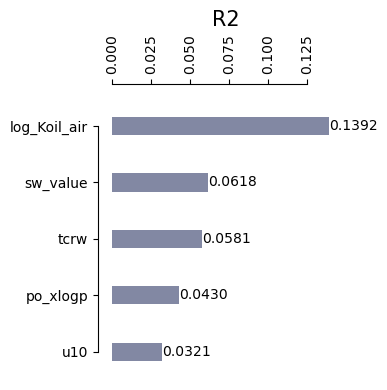

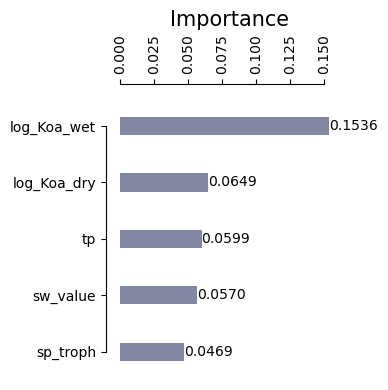

In [8]:
df_lr_rf = pd.read_csv(path_3_lrsw_forecast + 'lr_sws7_rfecv_features_RFcv.csv')
df_lr_mlr = pd.read_csv(path_2_preanalysis_data + 'mlr_lr_sws7.csv')

save_path_rf = path_ng_fig + "exfig1_lr_rfecv.svg"
save_path_mlr = path_ng_fig + "exfig1_lr_mlr.svg"

draw_rfecv_top(df_lr_mlr, save_path_mlr, 'lrl', top_num=5)
draw_rfecv_top(df_lr_rf, save_path_rf, 'lrnl', top_num=5)